<a href="https://colab.research.google.com/github/Principiante-en-Programacion-G8-ONE/Practicando-Python-para-Data-Science/blob/9-informe-final/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [64]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [10]:
ingreso_tienda = {
    'Tienda 1': tienda['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

tb_ingreso_tienda = pd.DataFrame.from_dict(ingreso_tienda, orient='index', columns=['Ingreso total'])
tb_ingreso_tienda

,Ingreso total
Tienda 1,1.150880e+09
Tienda 2,1.116344e+09
Tienda 3,1.098020e+09
Tienda 4,1.038376e+09


# 2. Ventas por categoría

In [8]:
total_por_categoria = {
    'Tienda 1': tienda.groupby('Categoría del Producto')['Precio'].sum(),
    'Tienda 2': tienda2.groupby('Categoría del Producto')['Precio'].sum(),
    'Tienda 3': tienda3.groupby('Categoría del Producto')['Precio'].sum(),
    'Tienda 4': tienda4.groupby('Categoría del Producto')['Precio'].sum()
}

tb_total_por_categoria = pd.DataFrame(total_por_categoria)
tb_total_por_categoria

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Artículos para el hogar,12698400.0,14746900.0,15060000.0,15074500.0
Deportes y diversión,39290000.0,34744500.0,35593100.0,33350100.0
Electrodomésticos,363685200.0,348567800.0,329237900.0,283260200.0
Electrónicos,429493500.0,410831100.0,410775800.0,409476100.0
Instrumentos musicales,91299000.0,104990300.0,77380900.0,75102400.0
Juguetes,17995700.0,15945400.0,19401100.0,20262200.0
Libros,8784900.0,10091200.0,9498700.0,9321300.0
Muebles,187633700.0,176426300.0,201072100.0,192528900.0


# 3. Calificación promedio de la tienda


In [48]:
calificacion_promedio = {
    'Tienda 1': tienda['Calificación'].mean(),
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

tb_calificacion_promedio = pd.DataFrame.from_dict(calificacion_promedio, orient='index', columns=['Calificación promedio'])
tb_calificacion_promedio

,Calificación promedio
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


# 4. Productos más y menos vendidos

In [52]:
productos_vendidos = []
ventas_productos = {
    'Tienda 1': tienda['Producto'].value_counts(),
    'Tienda 2': tienda2['Producto'].value_counts(),
    'Tienda 3': tienda3['Producto'].value_counts(),
    'Tienda 4': tienda4['Producto'].value_counts()
}

for tienda, ventas in ventas_productos.items():
  cantidad_maxima = ventas.max()
  cantidad_minima = ventas.min()

  venta_mayor = ventas[ventas == cantidad_maxima].index.tolist()
  venta_menor = ventas[ventas == cantidad_minima].index.tolist()

  for producto in venta_mayor:
    productos_vendidos.append({
        'Tienda': tienda,
        'Tipo': 'Más vendido',
        'Producto': producto,
        'Cantidad': cantidad_maxima
        })

  for producto in venta_menor:
    productos_vendidos.append({
        'Tienda': tienda,
        'Tipo': 'Menos vendido',
        'Producto': producto,
        'Cantidad': cantidad_minima
        })
tb_productos_vendidos = pd.DataFrame(productos_vendidos)
tb_productos_vendidos

,Tienda,Tipo,Producto,Cantidad
0,Tienda 1,Más vendido,Microondas,60
1,Tienda 1,Más vendido,TV LED UHD 4K,60
2,Tienda 1,Más vendido,Armario,60
3,Tienda 1,Menos vendido,Auriculares con micrófono,33
4,Tienda 1,Menos vendido,Celular ABXY,33
5,Tienda 2,Más vendido,Iniciando en programación,65
6,Tienda 2,Menos vendido,Juego de mesa,32
7,Tienda 3,Más vendido,Kit de bancas,57
8,Tienda 3,Menos vendido,Bloques de construcción,35
9,Tienda 4,Más vendido,Cama box,62


# 5. Envío promedio por tienda

In [66]:
costo_envio_promedio = {
    'Tienda 1': tienda['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

tb_costo_envio_promedio = pd.DataFrame.from_dict(costo_envio_promedio, orient='index', columns=['Costo de envío promedio'])
tb_costo_envio_promedio

,Costo de envío promedio
Tienda 1,26018.609580
Tienda 2,25216.235693
Tienda 3,24805.680373
Tienda 4,23459.457167


# 6. Graficos

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

## Ingresos por tienda

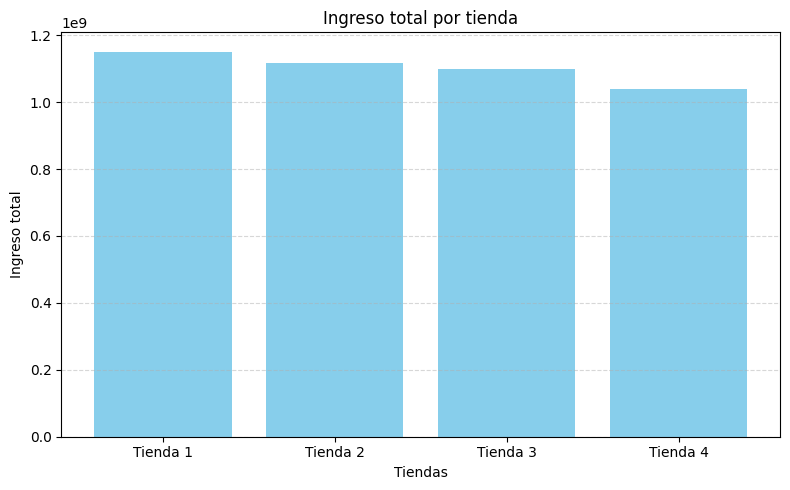

In [103]:
plt.figure(figsize=(8, 5))
plt.bar(tb_ingreso_tienda.index, tb_ingreso_tienda['Ingreso total'], color='skyblue')
plt.xlabel('Tiendas')
plt.ylabel('Ingreso total')
plt.title('Ingreso total por tienda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Ventas por categoría

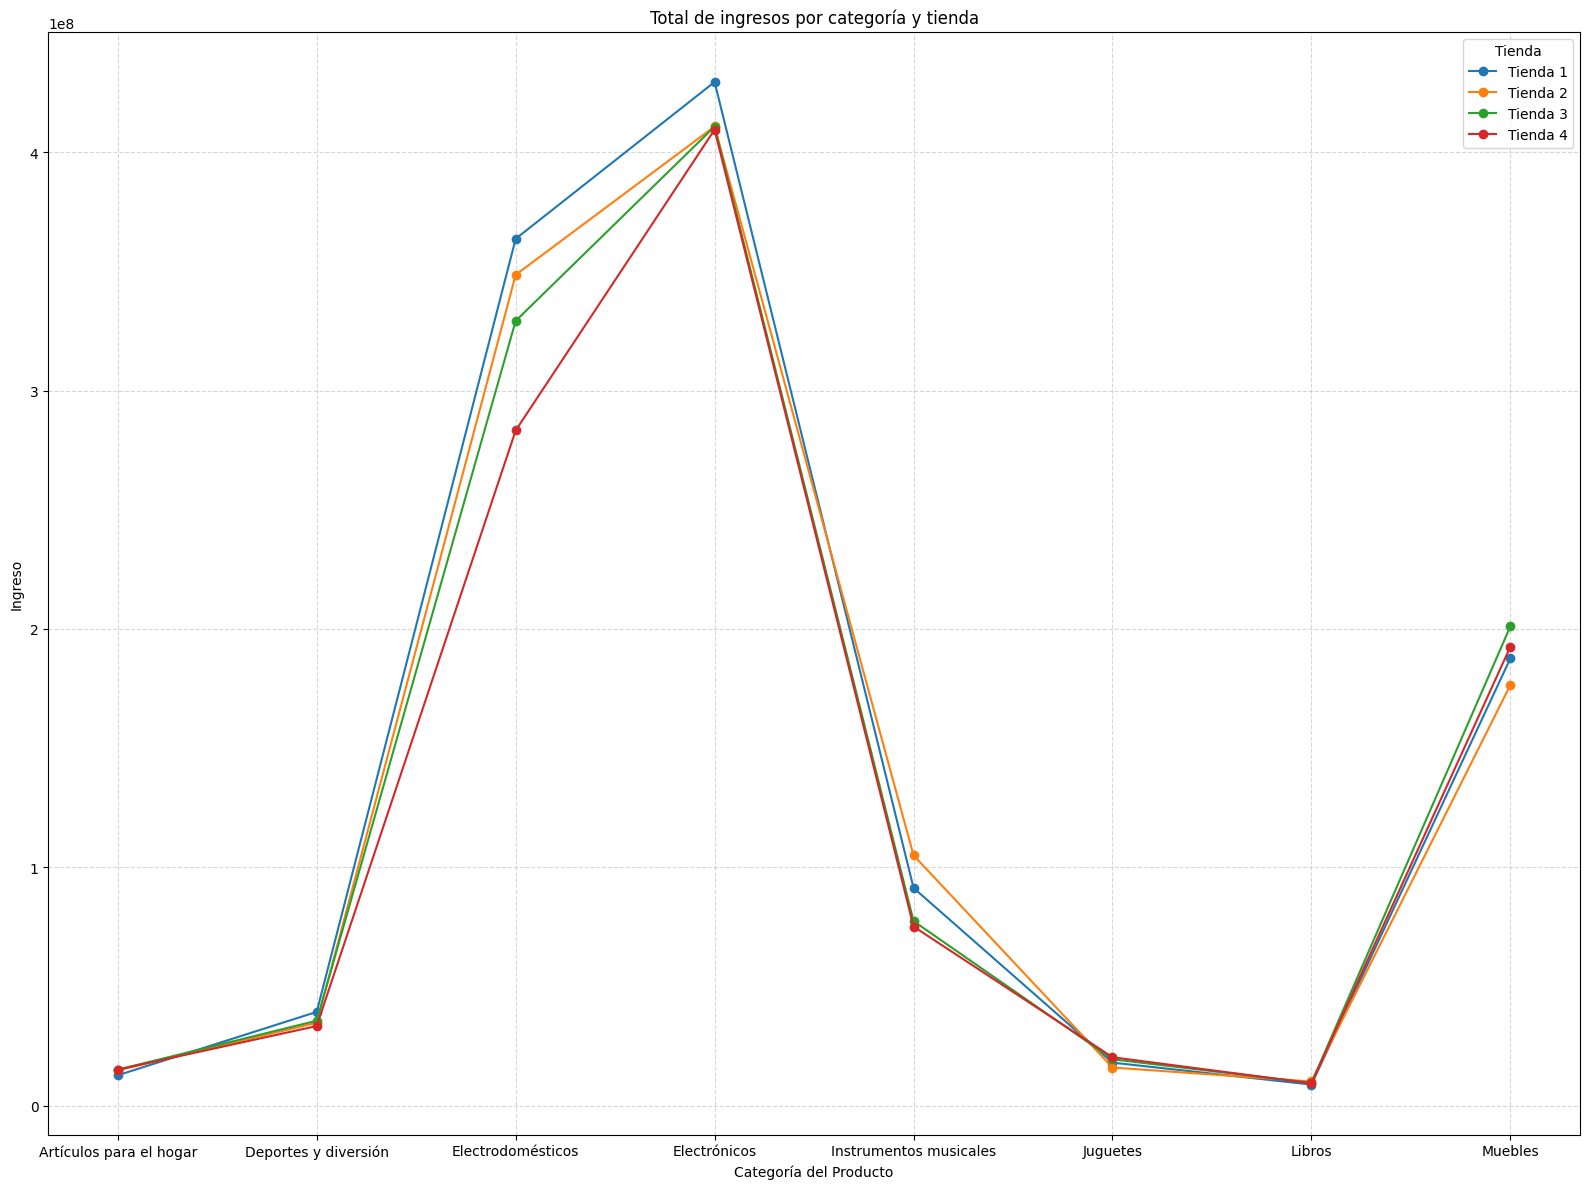

In [90]:
tb_total_por_categoria.plot(kind='line', marker='o', figsize=(16, 12))
plt.title('Total de ingresos por categoría y tienda')
plt.ylabel('Ingreso')
plt.xlabel('Categoría del Producto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

## Calificación promedio de la tienda

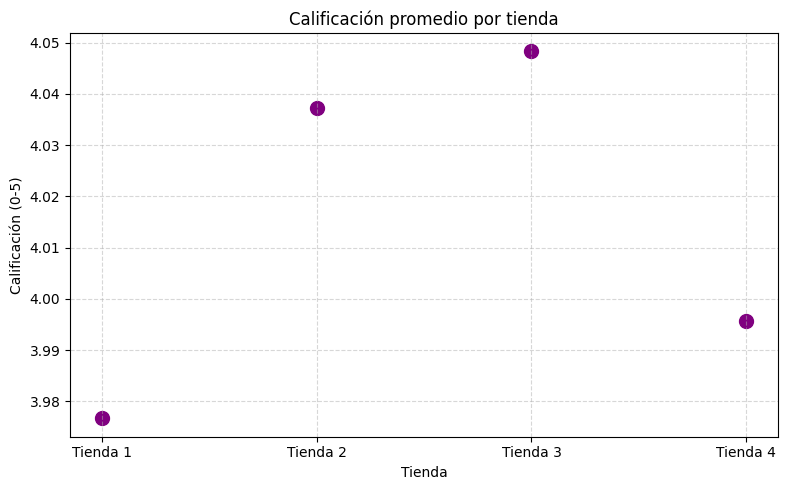

In [93]:
plt.figure(figsize=(8, 5))
plt.scatter(tb_calificacion_promedio.index, tb_calificacion_promedio['Calificación promedio'], color='purple', s=100)
plt.title('Calificación promedio por tienda')
plt.ylabel('Calificación (0-5)')
plt.xlabel('Tienda')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Productos más y menos vendidos

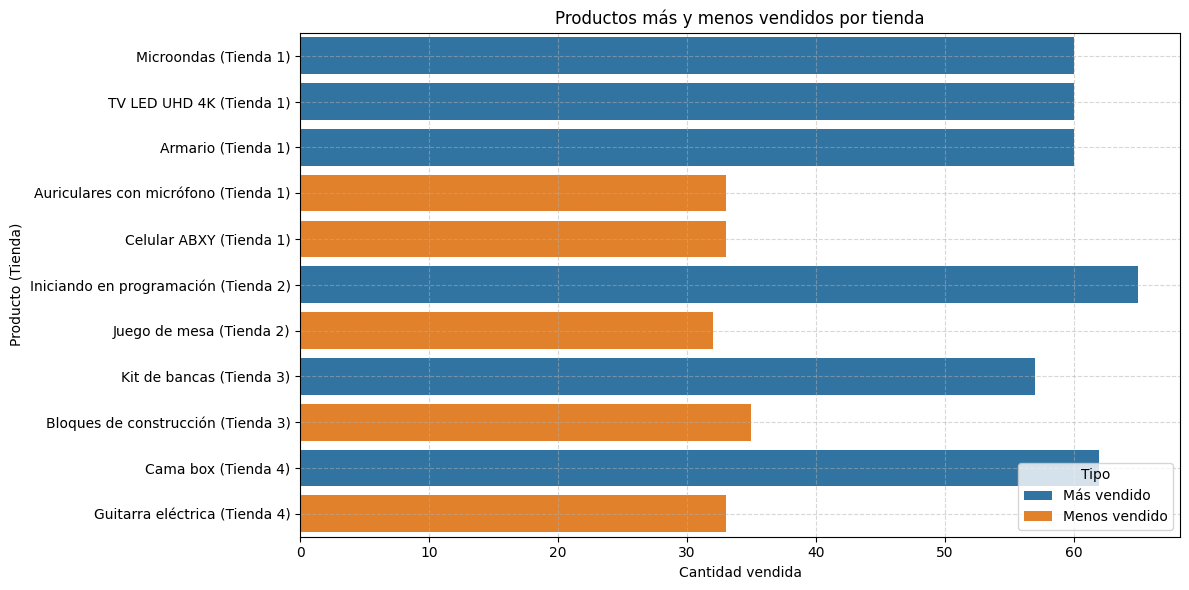

In [94]:
tb_productos_vendidos
tb_productos_vendidos['Producto_Tienda'] = tb_productos_vendidos['Producto'] + ' (' + tb_productos_vendidos['Tienda'] + ')'
plt.figure(figsize=(12, 6))
sns.barplot(data=tb_productos_vendidos, x='Cantidad', y='Producto_Tienda', hue='Tipo')
plt.title('Productos más y menos vendidos por tienda')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto (Tienda)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Costo de envío promedio

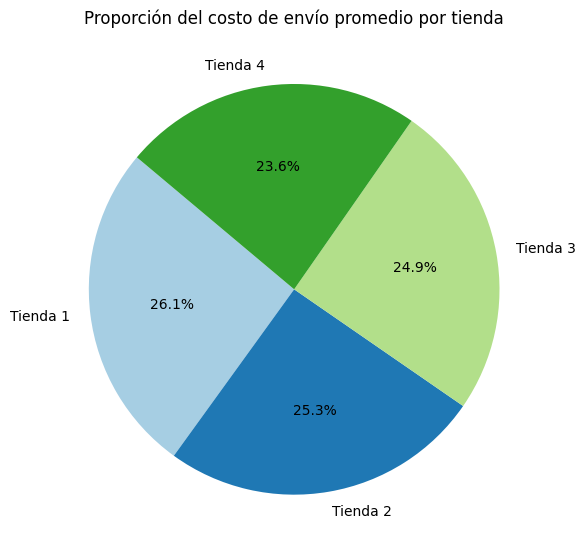

In [67]:
plt.figure(figsize=(6, 6))
plt.pie(tb_costo_envio_promedio['Costo de envío promedio'], labels=tb_costo_envio_promedio.index,
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporción del costo de envío promedio por tienda')
plt.tight_layout()
plt.show()

# 7. Informe Final

## Introducción

El objetivo de este análisis es identificar la tienda más adecuada para que el Sr. Juan decida cual debe vender para poder liberar recursos y enfocarse en un nuevo emprendimiento. Para tomar esta decision de forma objetiva, se analizaron múltiples factores de desempeño, incluyedo:
* Ingresos totales por tienda
* Ingresos por categoría de producto
* Calificaciones promedio de los clientes
* Productos más y menos vendidos
* Costo Promedio de envío

Los hallazgos se basan en visualizaciones generadas mediante Python, permitiendo comparar de manera integral el rendimiento de cada tienda.


## Desarrollo

#### **1. Ingresos Total por Tienda**

La Tienda 1 lidera e ingresos totales, seguido por las Tiendas 2 y 3.

La Tienda 4 genera menor ingreso total, lo cual sugiere menor volumen de ventas promedio.


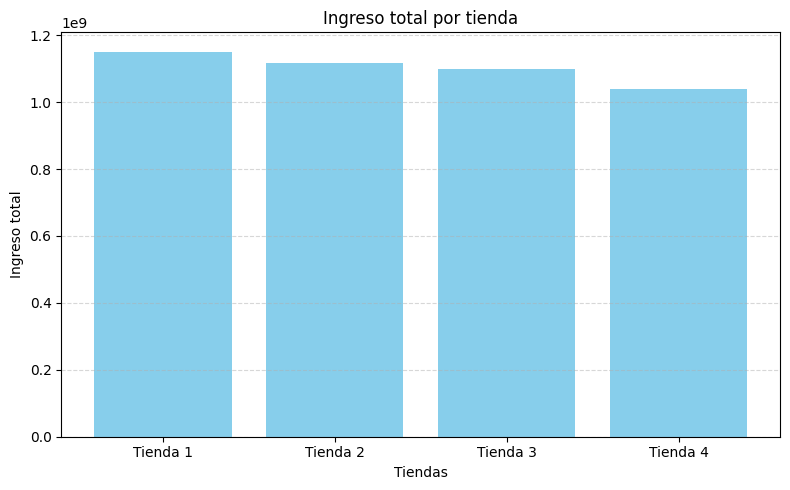

In [106]:
plt.figure(figsize=(8, 5))
plt.bar(tb_ingreso_tienda.index, tb_ingreso_tienda['Ingreso total'], color='skyblue')
plt.xlabel('Tiendas')
plt.ylabel('Ingreso total')
plt.title('Ingreso total por tienda')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **2. Ingresos por Categoría**


La categoría de "Electrónicos" domina en todas la tiendas. La tienda 1 destaca con el mayor ingreso en esta categoría.

Le sigue Electrodomésticos y Muebles como las categorías mas rentables.

En contraste, Libros, juguetes, Artículos para el hogar y Deportes y diversión son las categorías menos vendidas.

La Tienda 4 tiene el menor desempeño en las principales categorías.

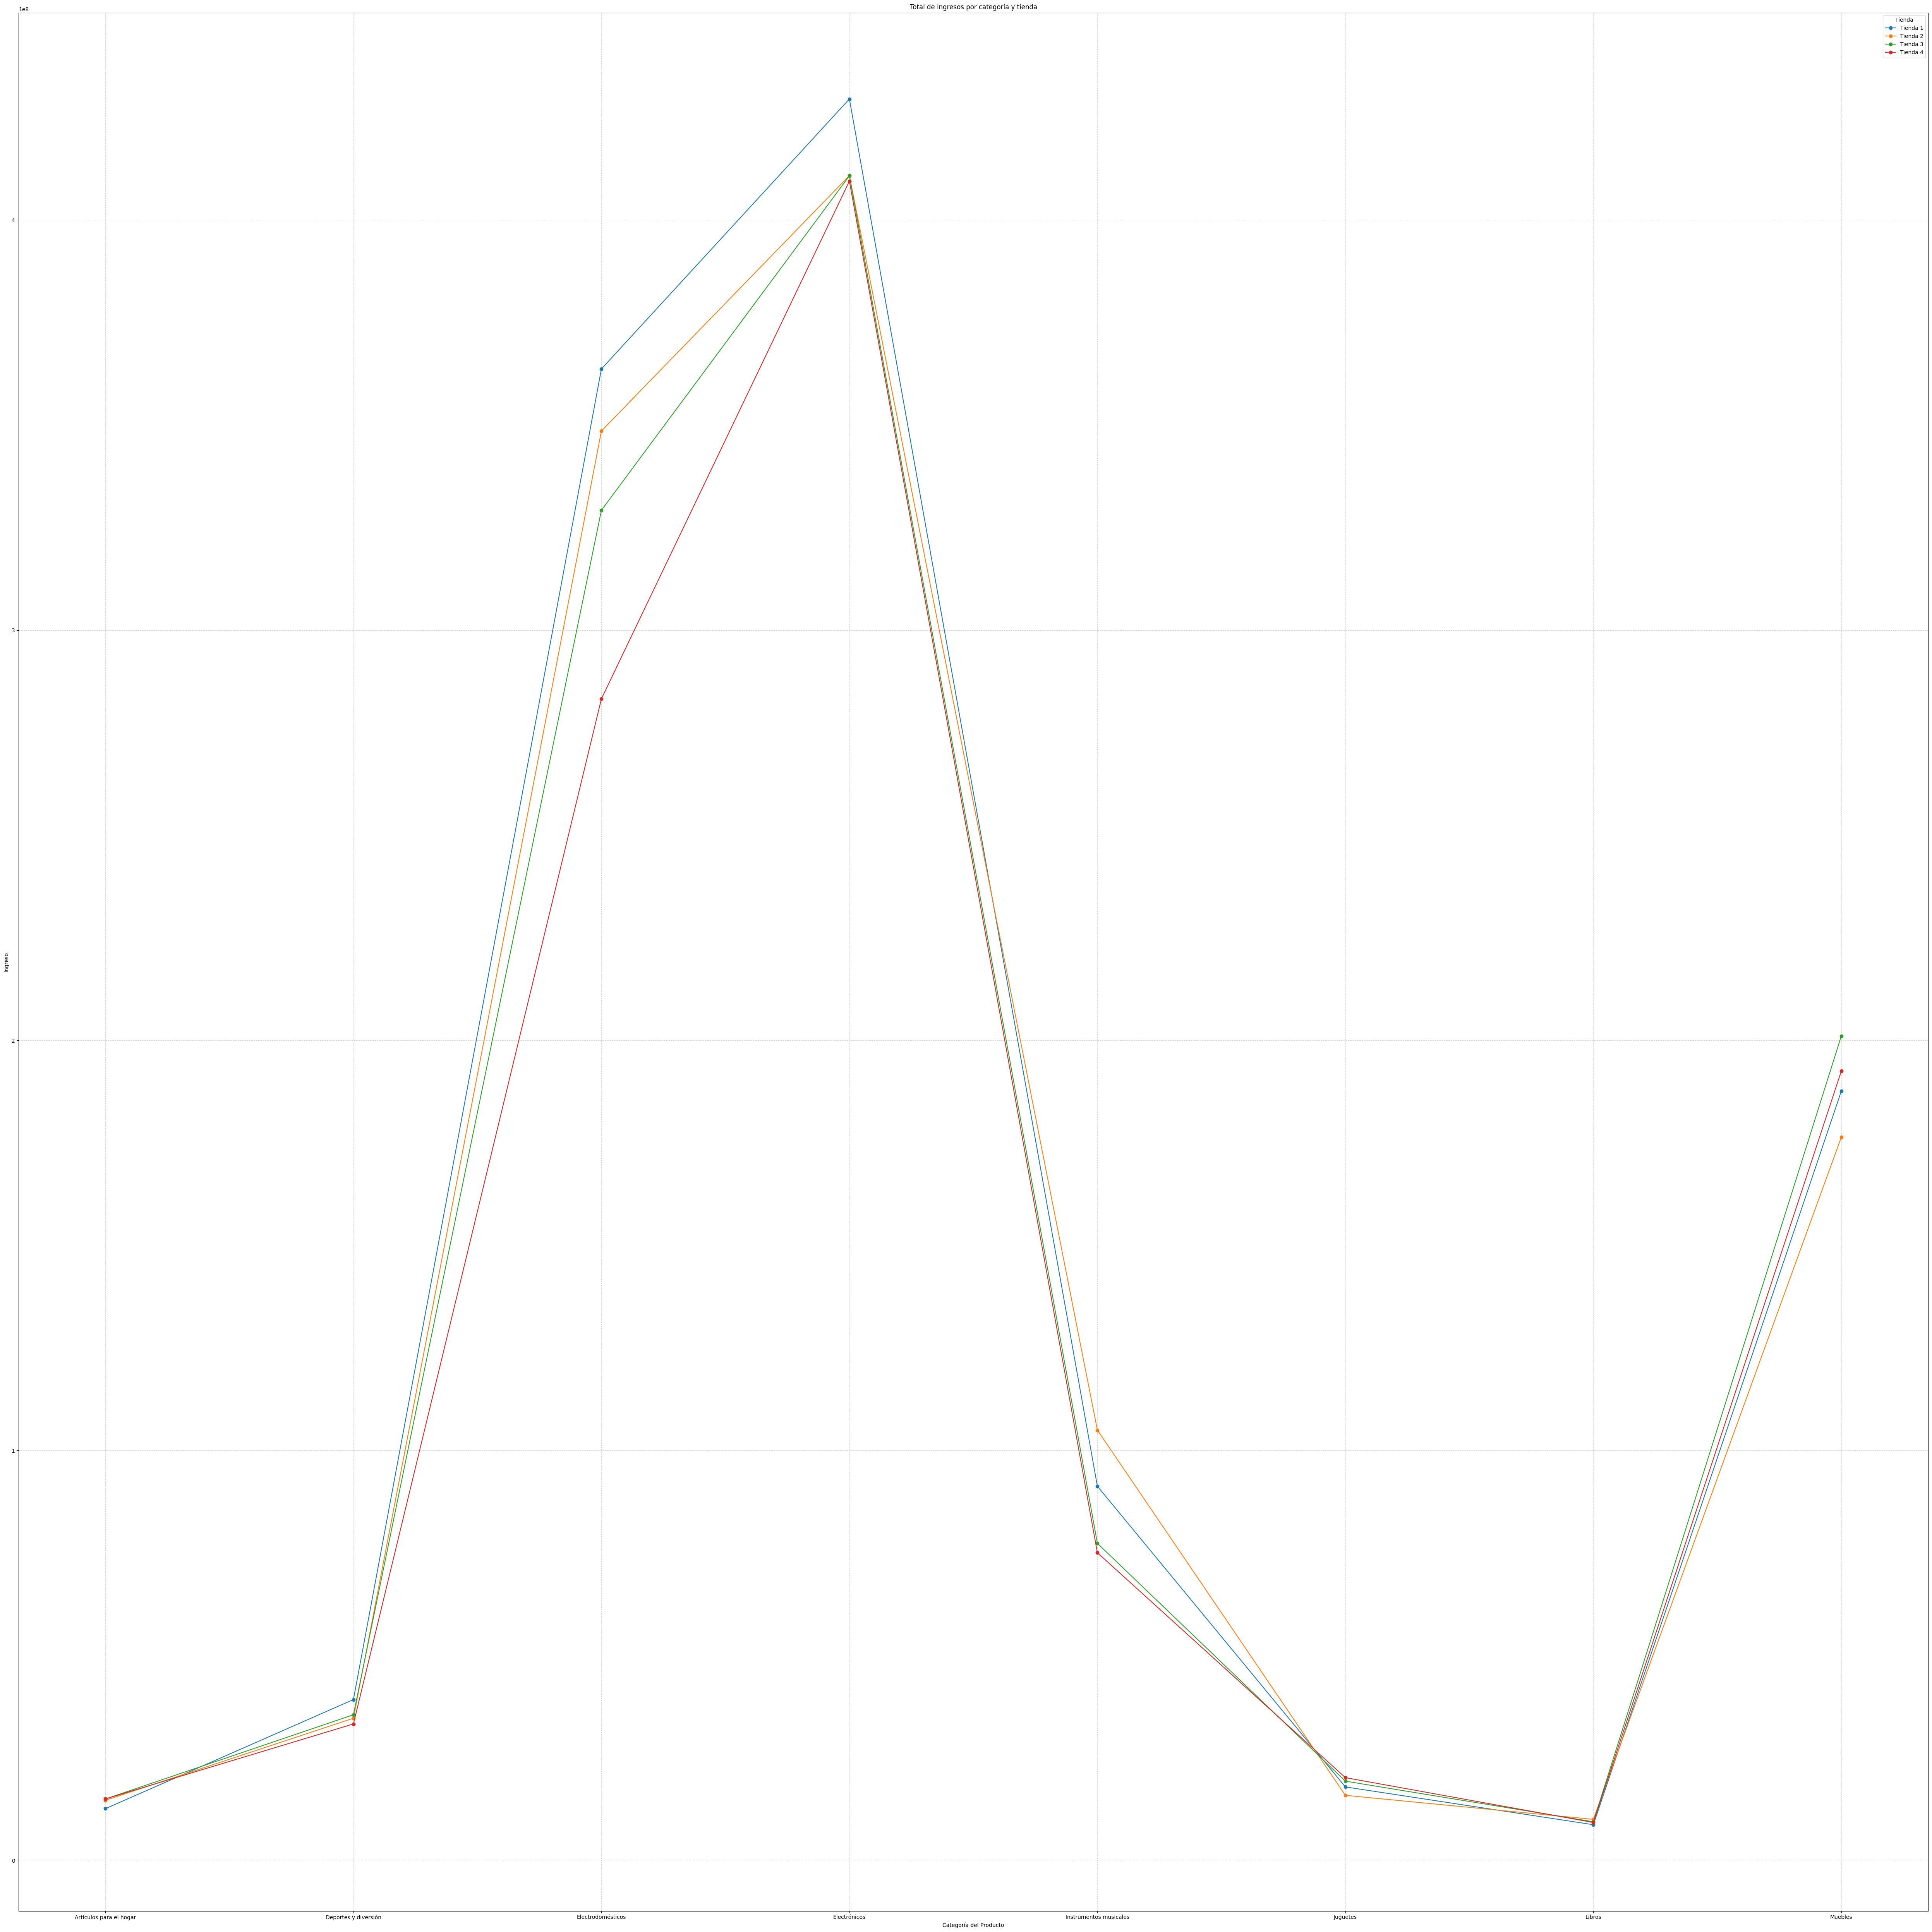

In [114]:
tb_total_por_categoria.plot(kind='line', marker='o', figsize=(50, 50))
plt.title('Total de ingresos por categoría y tienda')
plt.ylabel('Ingreso')
plt.xlabel('Categoría del Producto')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()

#### **3. Calificación promedio por Tienda**

La Tienda 3 tiene la calificación más alta, seguido de la Tienda 2.

La Tienda 1 Tiene la calificación mas baja.

La Tienda 4 también presenta una calificación baja, posicionándose por encima de la Tienda 1, pero lejos del promedio general.

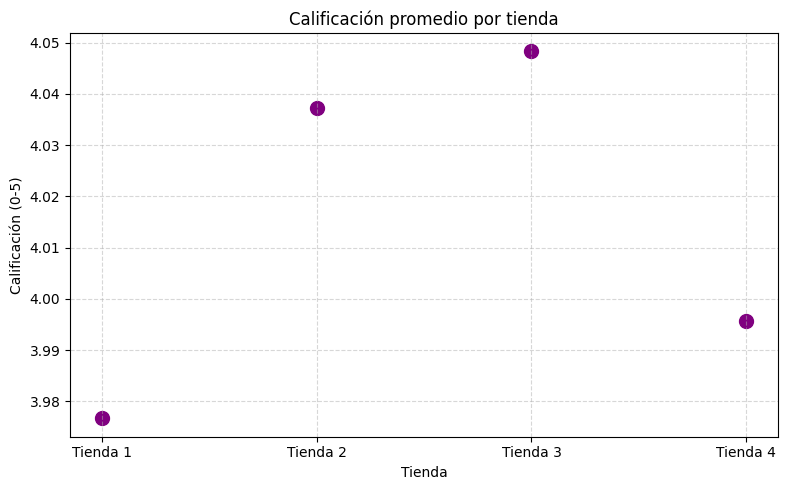

In [115]:
plt.figure(figsize=(8, 5))
plt.scatter(tb_calificacion_promedio.index, tb_calificacion_promedio['Calificación promedio'], color='purple', s=100)
plt.title('Calificación promedio por tienda')
plt.ylabel('Calificación (0-5)')
plt.xlabel('Tienda')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **4. Productos más y menos vendidos**


La Tienda 1 vende bien los productos de Microondas y TV LED UHD 4K.

La Tienda 4 también tiene productos exitosos como la Cámara box, pero otros, como la Guitarra eléctria, tiene pocas ventas.

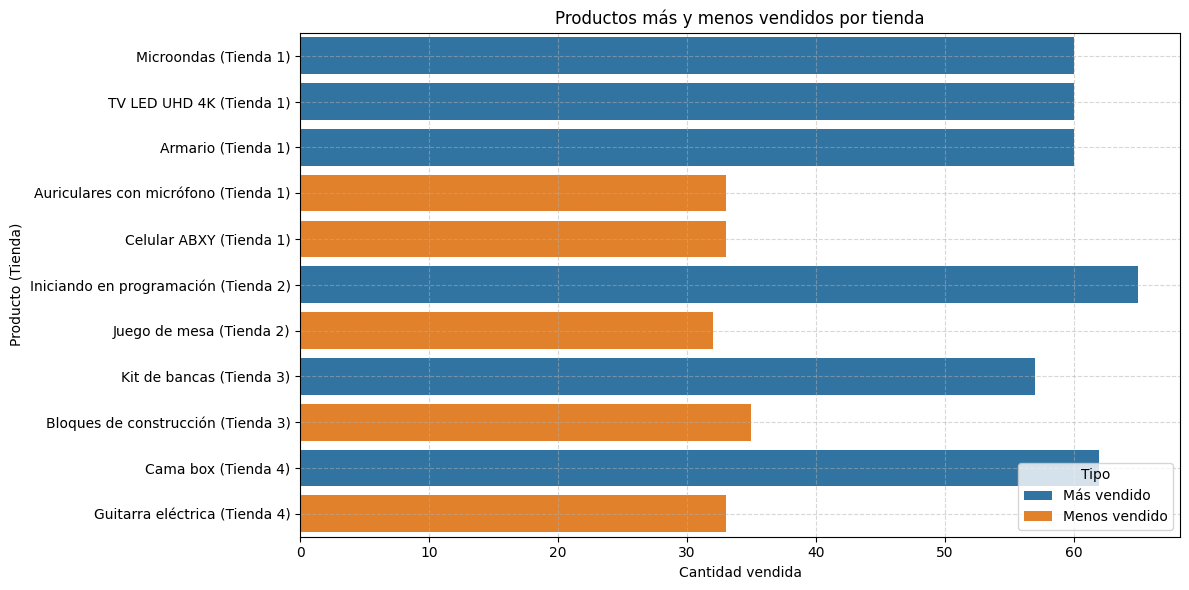

In [116]:
tb_productos_vendidos
tb_productos_vendidos['Producto_Tienda'] = tb_productos_vendidos['Producto'] + ' (' + tb_productos_vendidos['Tienda'] + ')'
plt.figure(figsize=(12, 6))
sns.barplot(data=tb_productos_vendidos, x='Cantidad', y='Producto_Tienda', hue='Tipo')
plt.title('Productos más y menos vendidos por tienda')
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto (Tienda)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **5. Costo promedio de envío**

La Tienda 4 tiene el costo de envío mas bajo, lo cual es una ventaja. Sin embargo, no se traduce en mayor ingreso ni mejor calificación.

La Tienda 1 tiene el envío mas caro, lo que puede estar afectando su calificación.

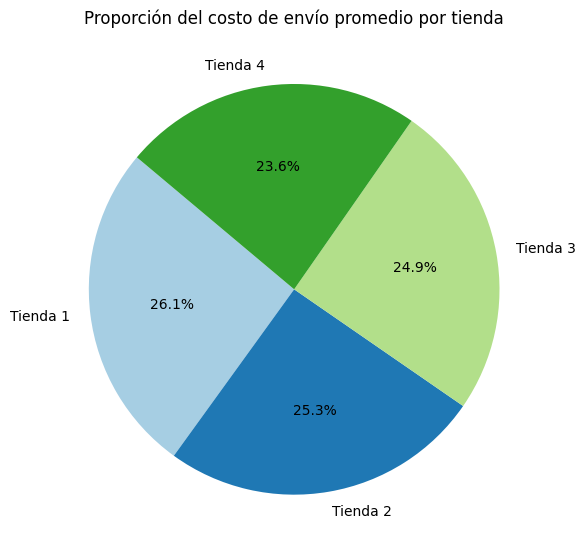

In [117]:
plt.figure(figsize=(6, 6))
plt.pie(tb_costo_envio_promedio['Costo de envío promedio'], labels=tb_costo_envio_promedio.index,
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporción del costo de envío promedio por tienda')
plt.tight_layout()
plt.show()

### Análisis

Aunque la Tienda 4 tiene un producto muy vendido y el costo de envío más bajo, sus debilidades estructurales son claras:
* Tiene el ingreso mas bajo de todas las tiendas.
* Tiene una de las calificaciones más bajas, solo por ensima de la Tienda 1.
* Tiene el desempeño más bajo en las categorías.

Por su parte, la Tienda 1 tiene los ingresos más altos pero la peor calificación y el envío mas costoso, lo que sugiere que debe de mejorar el trato con el cliente, pero aún así es más fuerte en ingresos y productos más vendidos respecto a la Tienda 4.


## Conclusión


En base al análisis de los datos de ventas, ingresos, calificaciones, productos y costos de envío, se concluye que la tienda que el Sr. Juan debería vender es la Tienda 4.  

### Justificación

* Menos ingreso total: La Tienda 4 es la que menos ingresos genera entre todas las tiendas analizadas.
* Desempeño bajopo categoría: Aunque participa en las principales categorías, sus ingresos son más bajos comparados con las otras tiendas.
* Productos con pocas ventas: Tiene productos  menos vendidos como la "Guitarra eléctrica", lo cual puede reflejar una menor demanda o poca alineación con el mercado.
* Aunque cuenta con el costo de envío mas bajo, esta ventaja no compensa sus debilidades en ingresos y reputación.

En resumen, la Tienda 4 es la opción menos competitiva dentro de la cadena de Alura Store, por lo tanto es la candidata más adecuada para ser vendida y así permitir que el Sr. Juan inicie un nuevo emprendimiento con mayor potencial.